## A Machine Learning Project in Python
### Code Written by Jessica Hooker
#### February 2024

**Brief Description of the Data:** The data set is practice data set comprising 10,000 rows with 50 variables. The data from patients from a large hospital chain' who were recently hospitalized and includes variables related to patient demographics, medical history, treatments, and responses to a patient satisfaction survey.

**Objective:** The primary goal of this analysis was to build a random forest model that accuractely predicts the length of a patient's recent hospitalization from patient demographic, health, and treatment characteristics. 

In [1]:
# python version
# (Pieran Training, 2023)

import sys
print("Python version:", sys.version)

Python version: 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]


#### Load in libraries

In [2]:
# data cleaning and wrangling libraries
import pandas as pd

import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale = 1)

# # machine learning libraries for random forest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import r2_score



#### Load and View the Data Set 

In [3]:
# read CSV file  
df = pd.read_csv("medical_clean.csv")

In [4]:
# view the top of the data set
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#  data set dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

#### Data Cleaning

In [6]:
# complete duplicates 
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [7]:
# partial duplicates 
df[df.duplicated(subset=['Customer_id'])]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [8]:
# data formatting
# round quantitative variables of interest
df[['VitD_levels','Initial_days']] = df[['VitD_levels','Initial_days']].round(2) 
df[['VitD_levels','Initial_days']].head()

,VitD_levels,Initial_days
0,19.14,10.59
1,18.94,15.13
2,18.06,4.77
3,16.58,1.71
4,17.44,1.25


In [9]:
# missing data 
# (Jee, 2023) 
df.isnull().sum()/df.shape[0]

CaseOrder             0.0
Customer_id           0.0
Interaction           0.0
UID                   0.0
City                  0.0
State                 0.0
County                0.0
Zip                   0.0
Lat                   0.0
Lng                   0.0
Population            0.0
Area                  0.0
TimeZone              0.0
Job                   0.0
Children              0.0
Age                   0.0
Income                0.0
Marital               0.0
Gender                0.0
ReAdmis               0.0
VitD_levels           0.0
Doc_visits            0.0
Full_meals_eaten      0.0
vitD_supp             0.0
Soft_drink            0.0
Initial_admin         0.0
HighBlood             0.0
Stroke                0.0
Complication_risk     0.0
Overweight            0.0
Arthritis             0.0
Diabetes              0.0
Hyperlipidemia        0.0
BackPain              0.0
Anxiety               0.0
Allergic_rhinitis     0.0
Reflux_esophagitis    0.0
Asthma                0.0
Services    

#### Exploratory Data Analysis 

In [10]:
# drop variables not included in the analysis 
# (maciejwww, 2020) 

df_rf = df.iloc[:,[15,18] + list(range(20,40))]
df_rf = df_rf.copy()

In [11]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   VitD_levels         10000 non-null  float64
 3   Doc_visits          10000 non-null  int64  
 4   Full_meals_eaten    10000 non-null  int64  
 5   vitD_supp           10000 non-null  int64  
 6   Soft_drink          10000 non-null  object 
 7   Initial_admin       10000 non-null  object 
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxie

In [12]:
# summary statistics for quantitative variables 
df_rf.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.51,20.64,18.00,36.00,53.00,71.00,89.00
VitD_levels,10000.0,17.96,2.02,9.81,16.63,17.95,19.35,26.39
Doc_visits,10000.0,5.01,1.05,1.00,4.00,5.00,6.00,9.00
Full_meals_eaten,10000.0,1.00,1.01,0.00,0.00,1.00,2.00,7.00
vitD_supp,10000.0,0.40,0.63,0.00,0.00,0.00,1.00,5.00
Initial_days,10000.0,34.46,26.31,1.00,7.90,35.84,61.16,71.98


In [13]:
# medians for quantitative variables 
df_rf.median(numeric_only = True)

Age                 53.00
VitD_levels         17.95
Doc_visits           5.00
Full_meals_eaten     1.00
vitD_supp            0.00
Initial_days        35.84
dtype: float64

In [14]:
# skewness for quantitative variables
df_rf.skew(numeric_only = True)

Age                 0.005117
VitD_levels         0.032469
Doc_visits         -0.018563
Full_meals_eaten    1.009461
vitD_supp           1.550205
Initial_days        0.070284
dtype: float64

In [15]:
# kurtosis for quantitative variables
df_rf.kurtosis(numeric_only = True)

Age                -1.189527
VitD_levels        -0.022453
Doc_visits          0.025999
Full_meals_eaten    1.042727
vitD_supp           2.330763
Initial_days       -1.754525
dtype: float64

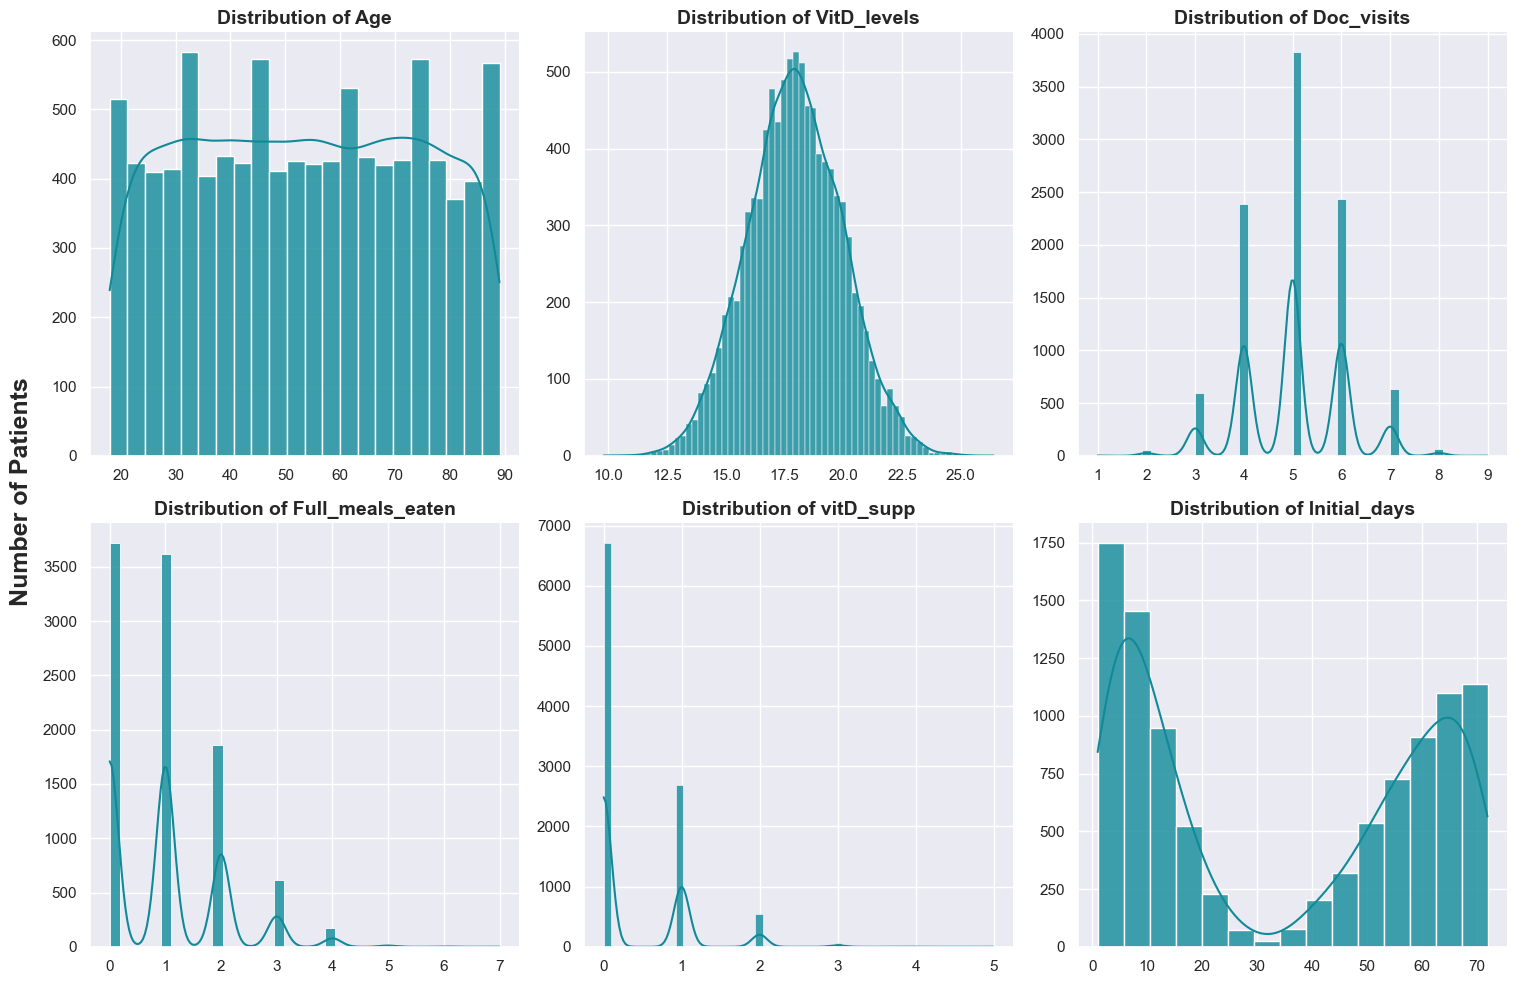

In [16]:
# univariate visualizations for quantitative variables

# pull out numeric columns (kattamuri, 2023) 
quant_cols = df_rf[['Age', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days']]

#adjust figure space
plt.figure(figsize = (15,10), tight_layout = True).text(-0.01, 0.5, 'Number of Patients', va='center', rotation='vertical', 
                                                       fontsize = 18, weight = "bold")
# plot histogram for each of the features 
# (Holtz, 2023) 
for i, feature in enumerate(quant_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_rf[feature], 
                 kde = True,
                 color = "#108A99",
                alpha = 0.8)
    plt.title(f"Distribution of {feature}", fontsize = 14, weight = "bold")
    plt.xlabel("")
    plt.ylabel("")
    sns.despine()

In [17]:
# create function to return frequency tables with counts and precents for qualitative variables
# (Saturn Cloud, 2023)
# (Pandas Development Team, 2020)

def freq_table(var):
    counts = var.value_counts()
    percents = var.value_counts()/len(var)
    table = pd.concat([counts, percents.round(2)], axis= 1, ignore_index=True)
    table = table.rename(columns = {0:'Count', 1:'Percent'})
    table.sort_index(inplace = True)
    return table

In [18]:
# pull out y_n cols
y_n_cols = df_rf[['Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis',
                    'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
                    'Reflux_esophagitis', 'Asthma']]


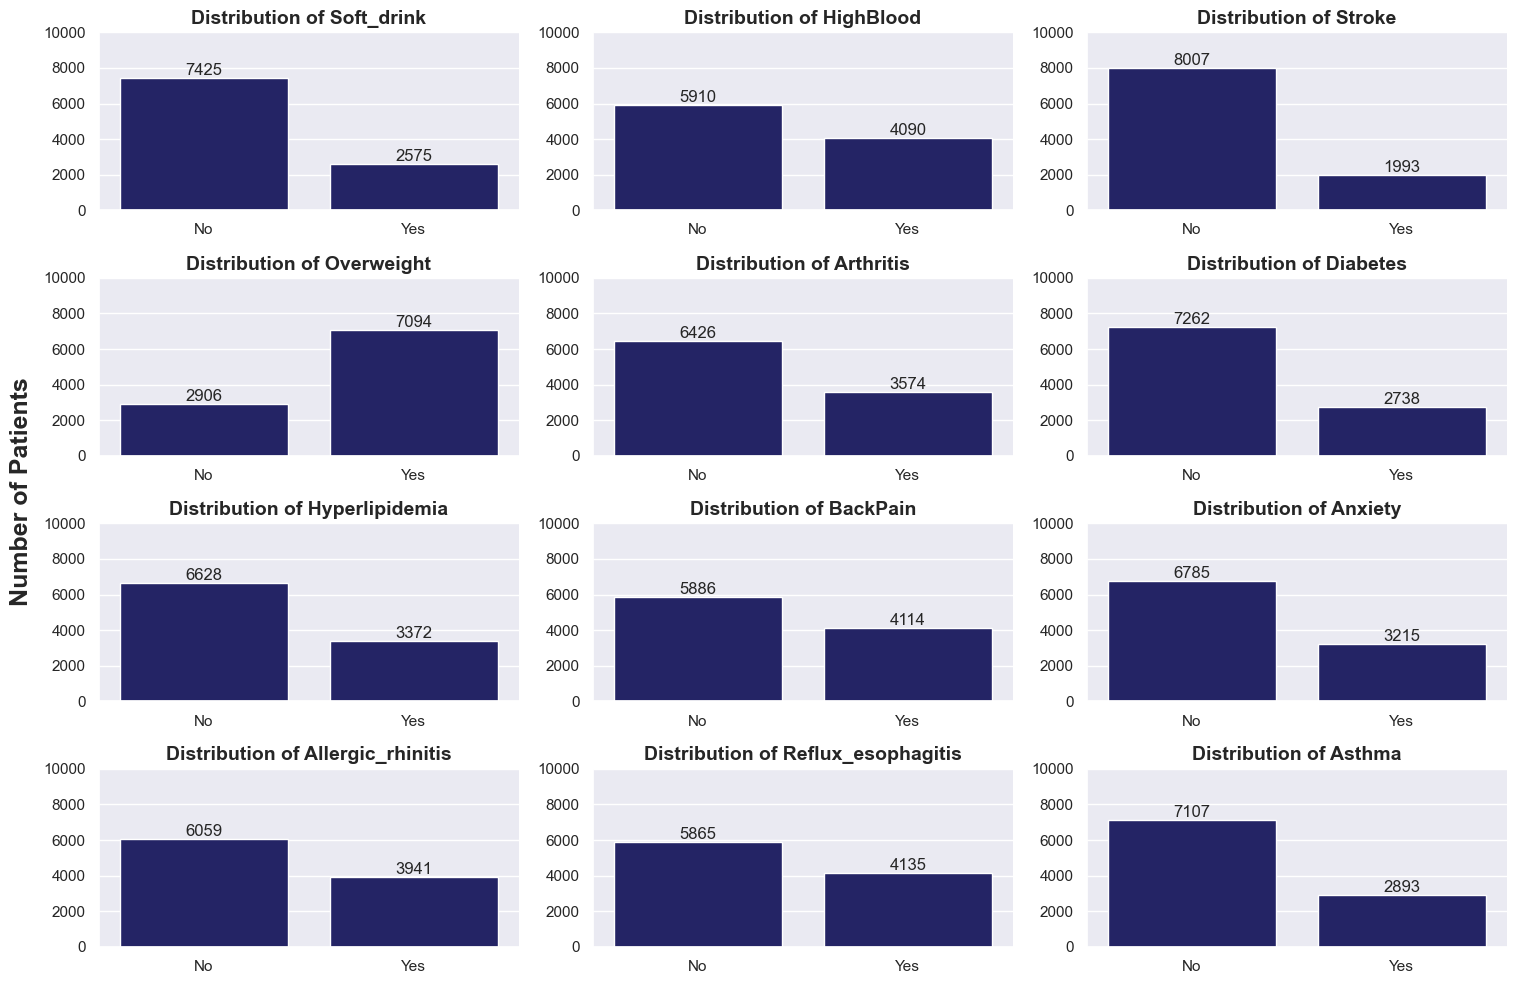

In [19]:
# univariate visualizations for y/n qualitative variables 
# (Waskom, 2021)

#adjust figure space
plt.figure(figsize = (15,10), tight_layout = True).text(-0.01, 0.5, 'Number of Patients', va='center', rotation='vertical', 
                                                       fontsize = 18, weight = "bold")
# plot bar plot for each of the features 
# (Holtz, 2023) 
for i, feature in enumerate(y_n_cols):
    plt.subplot(4, 3, i+1)
    tab = freq_table(df_rf[feature])
    bar = sns.barplot(x = tab.index, y = tab.iloc[:,0], color = 'midnightblue')
    plt.bar_label(bar.containers[0])
    bar.set_yticks(np.arange(0,11000,2000))
    plt.title(f"Distribution of {feature}", fontsize = 14, weight = "bold")
    plt.xlabel("")
    plt.ylabel("")
    sns.despine()
    




In [20]:
# pull out other qualitative cols
qual_cols = df_rf[['Gender', 'Initial_admin', 'Complication_risk','Services']]

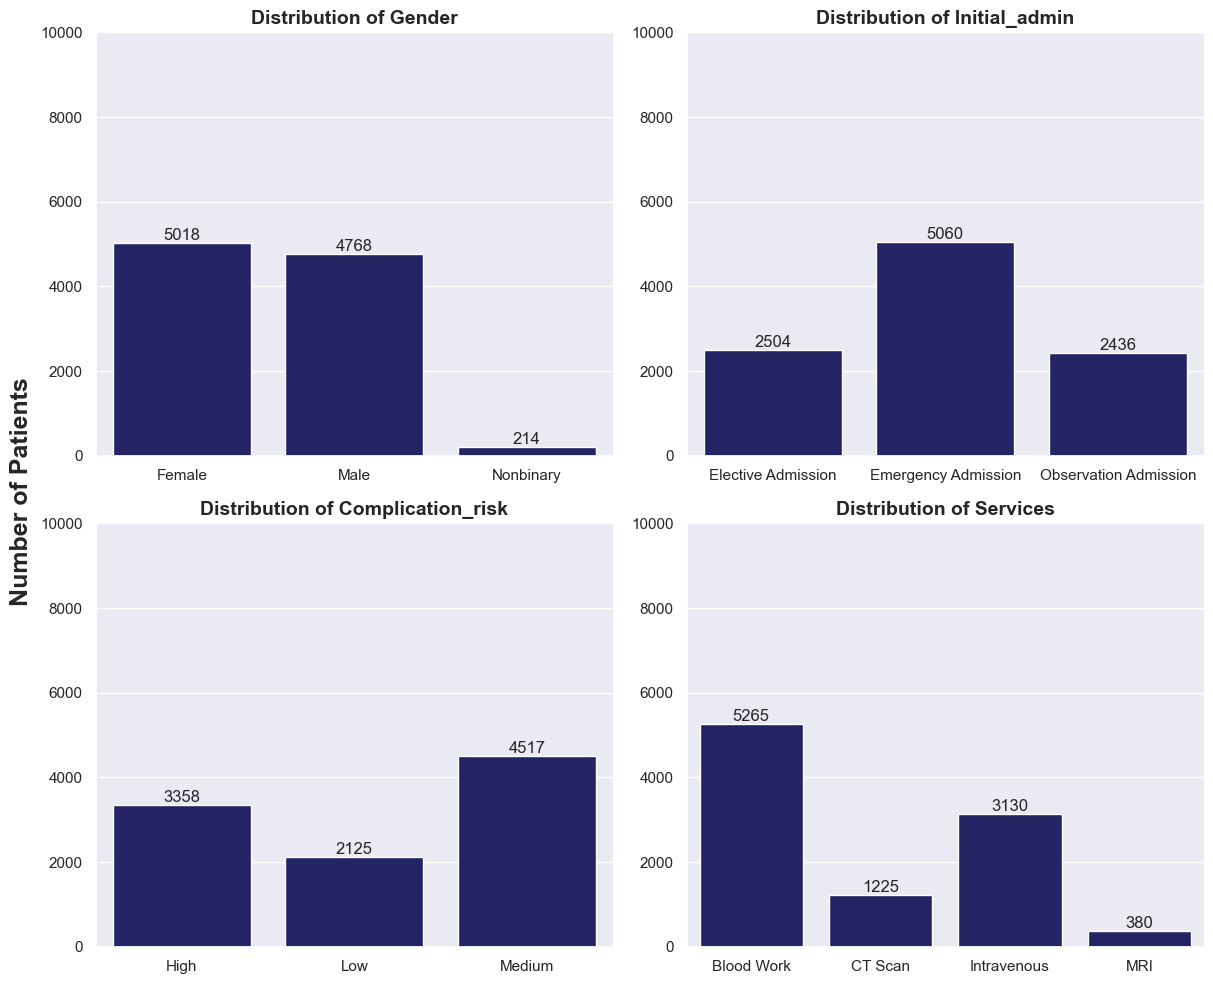

In [21]:
# univariate visualizations for other qualitative variables 
# (Waskom, 2021)

#adjust figure space
plt.figure(figsize = (12,10), tight_layout = True).text(-0.01, 0.5, 'Number of Patients', va='center', rotation='vertical', 
                                                       fontsize = 18, weight = "bold")
# plot bar plot for each of the features 
# (Holtz, 2023) 
for i, feature in enumerate(qual_cols):
    plt.subplot(2, 2, i+1)
    tab = freq_table(df_rf[feature])
    bar = sns.barplot(x = tab.index, y = tab.iloc[:,0], color = 'midnightblue')
    plt.bar_label(bar.containers[0])
    bar.set_yticks(np.arange(0,11000,2000))
    plt.title(f"Distribution of {feature}", fontsize = 14, weight = "bold")
    plt.xlabel("")
    plt.ylabel("")
    sns.despine()
    

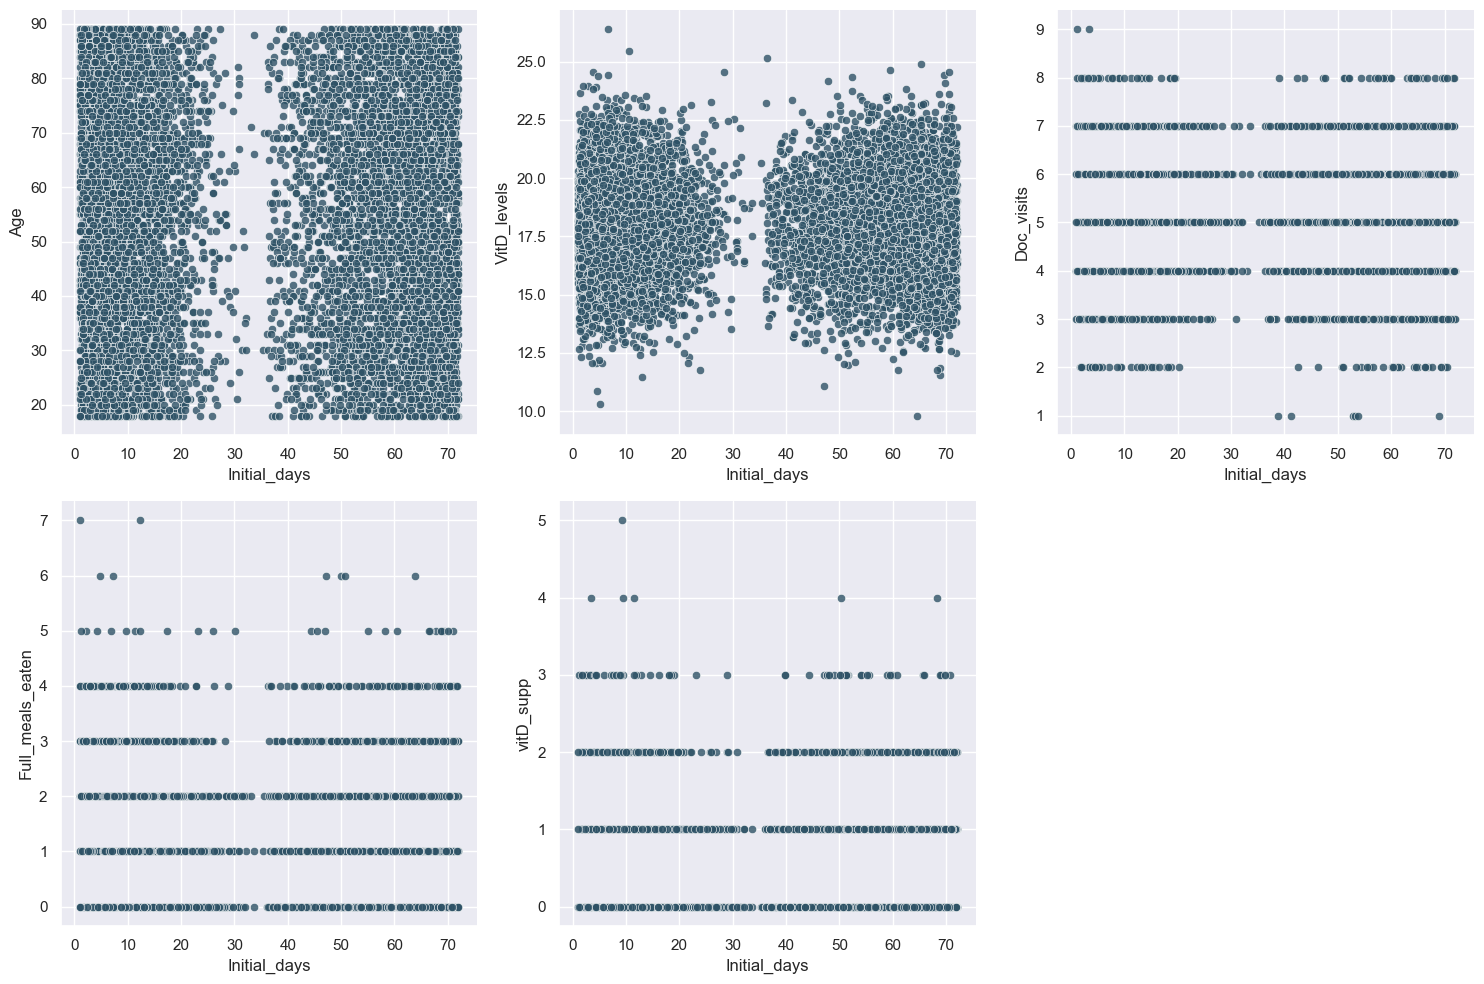

In [22]:
# bivariate visualizations for quantitative variables

#adjust figure space
plt.figure(figsize = (15,10), tight_layout = True)

# plot histogram for each of the features 
# (Holtz, 2023) 
for i, feature in enumerate(quant_cols.iloc[:,:-1]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data = df_rf,
                    x= "Initial_days",
                    y= feature,
                    color = "#2E5266",
                    alpha = 0.8)
    plt.xlabel("Initial_days")
    plt.ylabel(f"{feature}")
    sns.despine()

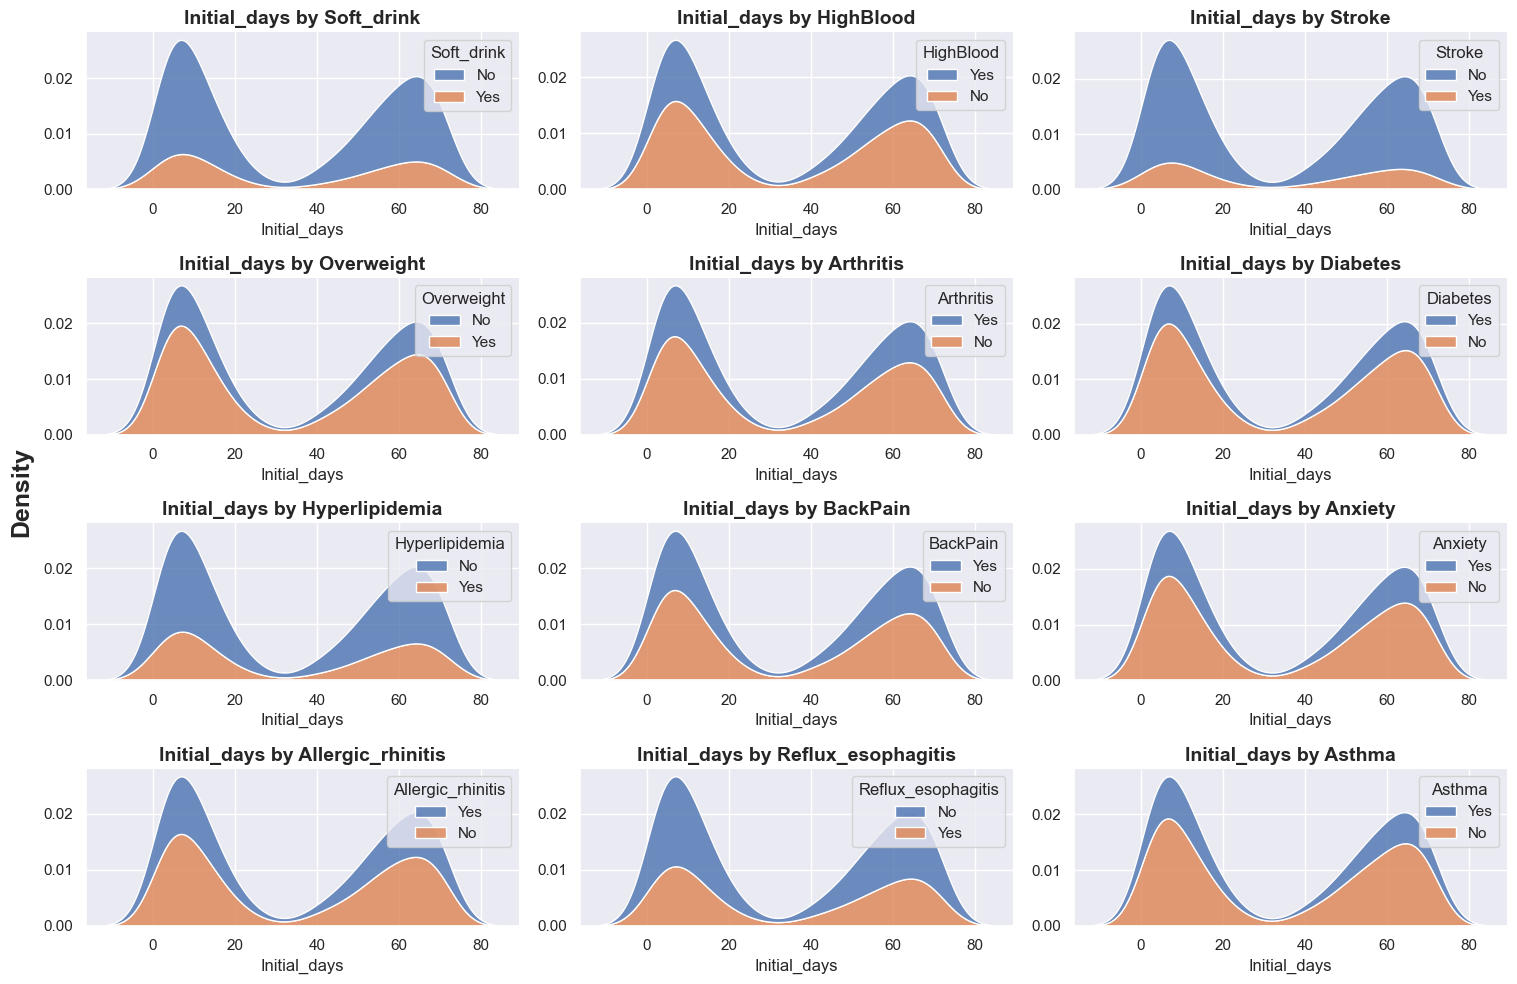

In [23]:
# bivariate visualizations of yes/no qualitative variables with dependent variable
#adjust figure space
plt.figure(figsize = (15,10), tight_layout = True).text(-0.01, 0.5, 'Density', va='center', rotation='vertical', 
                                                       fontsize = 18, weight = "bold")
# plot bar plot for each of the features 
# (Holtz, 2023) 
for i, feature in enumerate(y_n_cols):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x = df_rf['Initial_days'],
                hue = df_rf[feature],
                multiple='stack',
                alpha = 0.8)
    plt.title(f"Initial_days by {feature}", fontsize = 14, weight = "bold")
    plt.xlabel("Initial_days")
    plt.ylabel("")
    sns.despine()




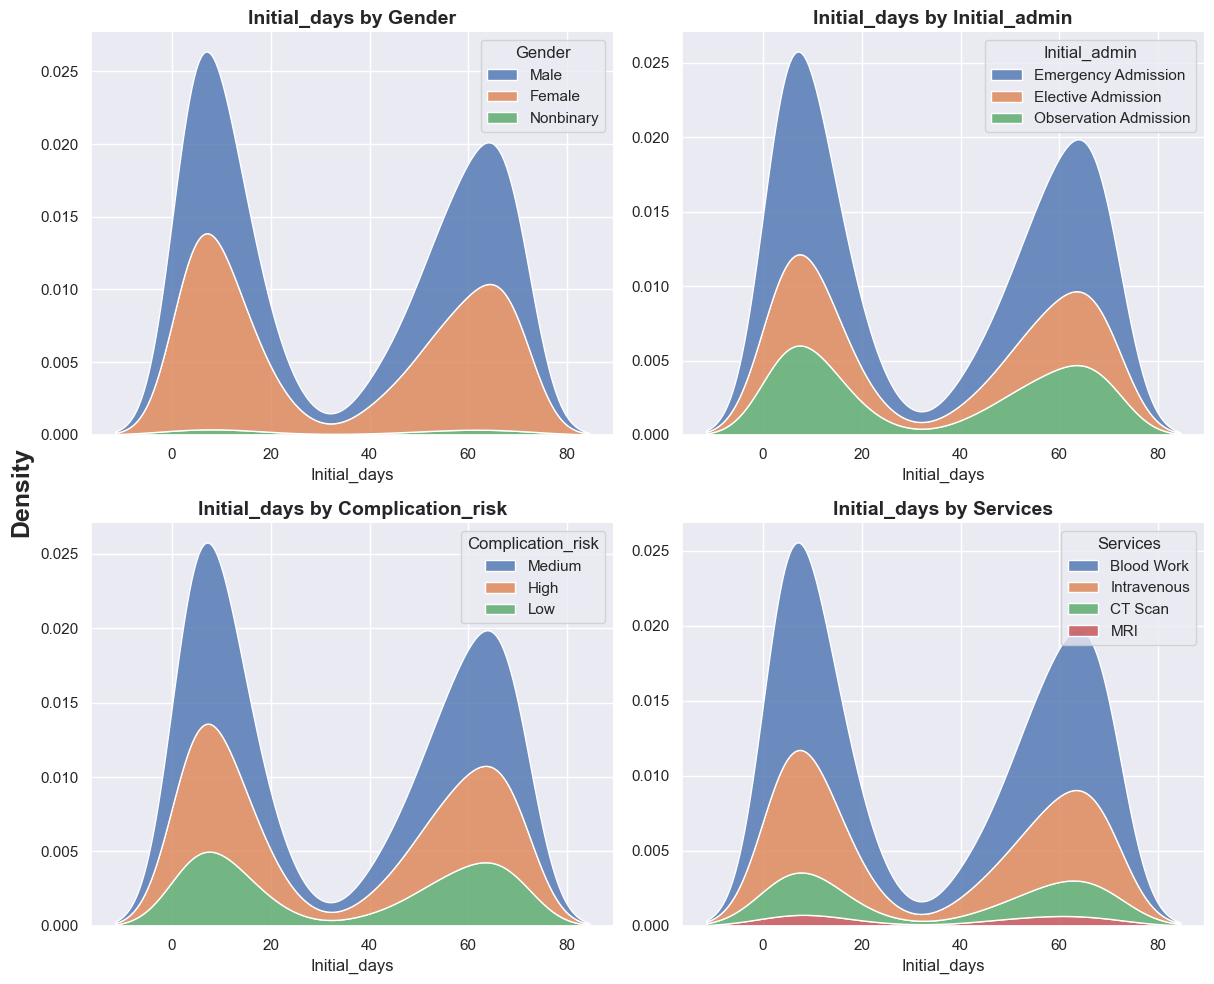

In [24]:
# bivariate visualizations of yes/no qualitative variables with dependent variable 
#adjust figure space
plt.figure(figsize = (12,10), tight_layout = True).text(-0.01, 0.5, 'Density', va='center', rotation='vertical', 
                                                       fontsize = 18, weight = "bold")
# plot bar plot for each of the features 
# (Python Graph Gallery, 2023) 
for i, feature in enumerate(qual_cols):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x = df_rf['Initial_days'],
                hue = df_rf[feature],
                multiple='stack',
                alpha = 0.8)
    plt.title(f"Initial_days by {feature}", fontsize = 14, weight = "bold")
    plt.xlabel("Initial_days")
    plt.ylabel("")
    sns.despine()


#### Data Tranformation 

In [25]:
# convert qualitative variables to categorical variables 
cat_cols = ['Gender', 'Initial_admin', 'Complication_risk',
                                                 'Services', 'Soft_drink', 'HighBlood', 'Stroke', 
                                                 'Overweight', 'Arthritis', 'Diabetes', 
                                                 'Hyperlipidemia', 'BackPain', 'Anxiety', 
                                                 'Allergic_rhinitis','Reflux_esophagitis', 
                                                 'Asthma']
cat_cols


['Gender',
 'Initial_admin',
 'Complication_risk',
 'Services',
 'Soft_drink',
 'HighBlood',
 'Stroke',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma']

In [26]:
# convert qualitative variables to categorical variables 
for col in cat_cols:
    df_rf[col] = df_rf[col].astype('category')

In [27]:
df_rf.dtypes

Age                      int64
Gender                category
VitD_levels            float64
Doc_visits               int64
Full_meals_eaten         int64
vitD_supp                int64
Soft_drink            category
Initial_admin         category
HighBlood             category
Stroke                category
Complication_risk     category
Overweight            category
Arthritis             category
Diabetes              category
Hyperlipidemia        category
BackPain              category
Anxiety               category
Allergic_rhinitis     category
Reflux_esophagitis    category
Asthma                category
Services              category
Initial_days           float64
dtype: object

In [28]:
# dummy code qualitative variables 
df_dummies = pd.get_dummies(df_rf, columns = ['Gender', 'Initial_admin', 'Complication_risk',
                                                         'Services', 'Soft_drink', 'HighBlood', 'Stroke', 
                                                         'Overweight', 'Arthritis','Diabetes', 
                                                         'Hyperlipidemia', 'BackPain', 'Anxiety', 
                                                         'Allergic_rhinitis', 'Reflux_esophagitis', 
                                                         'Asthma']).astype('int64') 
df_dummies.head()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,Gender_Female,Gender_Male,Gender_Nonbinary,Initial_admin_Elective Admission,...,BackPain_No,BackPain_Yes,Anxiety_No,Anxiety_Yes,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes
0,53,19,6,0,0,10,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
1,51,18,4,2,1,15,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,53,18,4,1,0,4,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3,78,16,4,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
4,22,17,5,0,2,1,1,0,0,1,...,1,0,1,0,0,1,1,0,1,0


#### Training-Test Split

In [30]:
#separate predictors and dependent variable 
x = df_dummies.drop('Initial_days', axis =1)
y = df_dummies.loc[:,'Initial_days']

In [31]:
x.shape

(10000, 42)

In [32]:
y.shape

(10000,)

In [33]:
# split data into training and test sets -- Section D1
seed = 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = seed)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000, 42) (3000, 42) (7000,) (3000,)


#### Random Forest Modeling

##### Model Preprocessing

In [35]:
# hyperparameter tuning
rf = RandomForestRegressor(random_state=seed)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

In [36]:
# create tuning grid 
params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4,6,8],
             'min_samples_leaf': [0.05, 0.1, 0.2]
            }

In [37]:
# grid search object 
grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       scoring = 'neg_mean_squared_error',
                       cv=10,
                       verbose = 1,
                       n_jobs = -1)


In [38]:
# fit to training set 
grid_rf.fit(x_train, np.ravel(y_train))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=3), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_leaf': [0.05, 0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
# get cross validation results 
results_df = pd.DataFrame(grid_rf.cv_results_)

print(results_df[['param_max_depth','param_min_samples_leaf','param_n_estimators','mean_test_score']])

   param_max_depth param_min_samples_leaf param_n_estimators  mean_test_score
0                4                   0.05                300      -687.169355
1                4                   0.05                400      -687.159519
2                4                   0.05                500      -687.185050
3                4                    0.1                300      -687.042219
4                4                    0.1                400      -687.036471
5                4                    0.1                500      -687.015731
6                4                    0.2                300      -686.729597
7                4                    0.2                400      -686.728113
8                4                    0.2                500      -686.728146
9                6                   0.05                300      -687.258494
10               6                   0.05                400      -687.243884
11               6                   0.05                500    

In [40]:
# print the the best hyper parameters 
best_params = grid_rf.best_params_
print('Optimal Model Hyperparameters:', best_params)

Optimal Model Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 0.2, 'n_estimators': 400}


In [41]:
# extract the best MSE from the model 
best_cv_score = grid_rf.best_score_
print('Best MSE:', best_cv_score)

Best MSE: -686.728112645276


##### Final Model

In [42]:
# exctract the final model parameters 
best_model = grid_rf.best_estimator_

In [43]:
# model metrics for the training data 
# (Pedregosa et al., 2011)
train_predicted = best_model.predict(x_train)
train_mse = MSE(y_train, train_predicted)
train_rmse = RMSE(y_train, train_predicted)
train_r2 = r2_score(y_train, train_predicted)

print('MSE of Training Model:', train_mse.round(5))
print('RMSE of Training Model:', train_rmse.round(5))
print('R-Squared of Training Model:', train_r2.round(5))

MSE of Training Model: 685.41452
RMSE of Training Model: 26.18042
R-Squared of Training Model: 0.00162


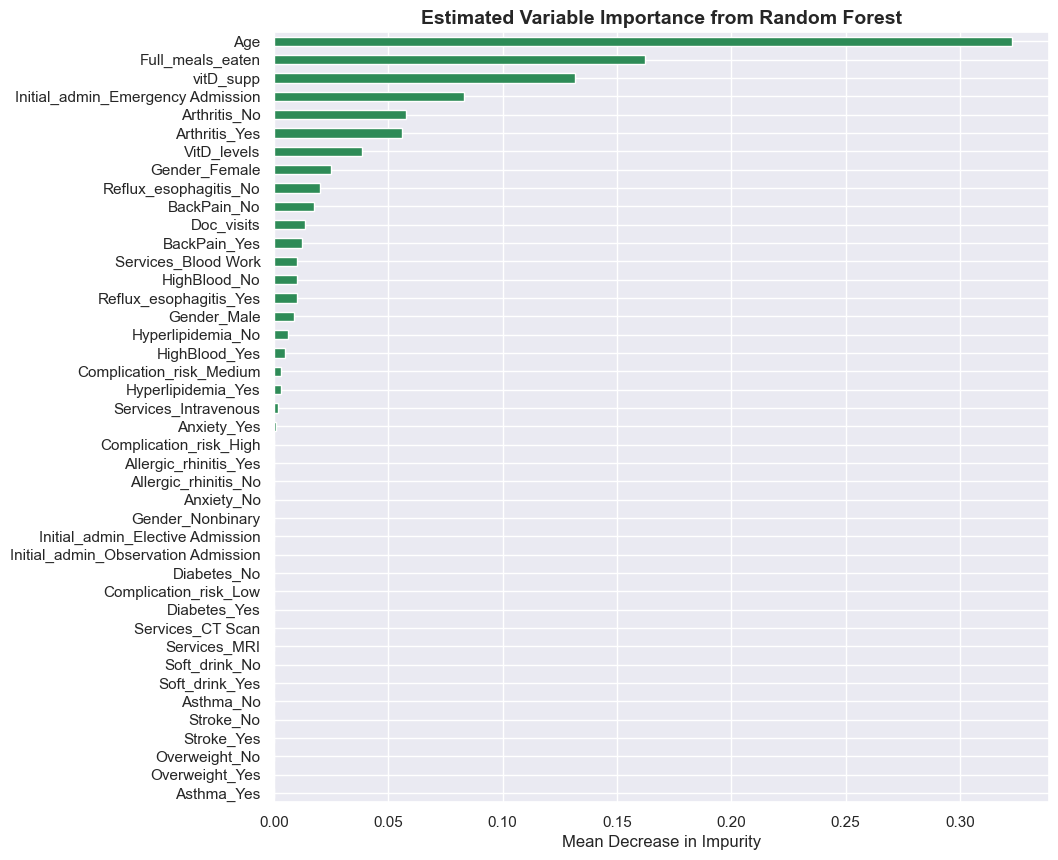

In [44]:
# feature importance
# (Pedregosa et al., 2011; Ptonska & Ptonski, 2022)

importances_rf = pd.Series(best_model.feature_importances_, index = x.columns)

# sort values
sorted_importance = importances_rf.sort_values()

# plot importances
plt.figure(figsize = (10,10))
sorted_importance.plot(kind = 'barh', color = 'seagreen')
plt.title("Estimated Variable Importance from Random Forest", fontsize = 14, weight = "bold")
plt.xlabel("Mean Decrease in Impurity")

plt.show()


In [45]:
# predict to the test data 
y_pred = best_model.predict(x_test)

In [46]:
#### evaluate performance on the test set 
# (Pedregosa et al., 2011)
test_mse = MSE(y_test, y_pred)
test_rmse = RMSE(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print('MSE for Test Data:', test_mse.round(5))
print('RMSE for Test Data:', test_rmse.round(5))
print('R-Squared for Test Data:', test_r2.round(5))

MSE for Test Data: 703.73157
RMSE for Test Data: 26.52794
R-Squared for Test Data: 0.00026


In [47]:
# create a baseline model for the test set 
# (nkmk.me, 2024)
y_mean = np.full((3000, 1), y_test.mean())
y_mean.shape

(3000, 1)

In [48]:
# Baseline Model Performance 
base_mse = MSE(y_test, y_mean)
base_rmse = RMSE(y_test, y_mean)
base_r2 = r2_score(y_test, y_mean)

print('MSE of Baseline Model:', base_mse.round(5))
print('RMSE of Baseline Model:', base_rmse.round(5))
print('R-Squared of Baseline Model:', base_r2.round(8))

MSE of Baseline Model: 703.91538
RMSE of Baseline Model: 26.5314
R-Squared of Baseline Model: 0.0


In [ ]:
# References

# Holtz, Y. (2023). The Python Graph Gallery. https://python-graph-gallery.com/
# Jee, K. (2023, June 2021). Exhaustive Regression & Parameter Tuning. kaggle. https://www.kaggle.com/code/kenjee/exhaustive-regression-parameter-tuning
# kattamuri. (2023, December 6). Exploratory Data Analysis in Python. Geeks for Geeks. https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/#
# maciejwww (2020, October 13). Answer to: Pass column index and range simultaneously in Pandas iloc. Stack Overflow. https://stackoverflow.com/questions/44794739/pass-column-index-and-range-simultaneously-in-pandas-iloc
# nkmk.me. (2024, January 23) https://note.nkmk.me/en/python-numpy-zeros-ones-full/
# Pandas Development Team. (2020). Pandas. Version 2.2.0. 
# Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. 
# Pierian Training (2023, April 11). Python Tutorial: How to check Python version in Jupyter Notebook. Educate 360. https://pieriantraining.com/python-tutorial-how-to-check-python-version-in-jupyter-notebook/
# Ptonska, A. & Ptonski, P. (2022, November 8). Save a Plot to a File in Matplotlib (using 14 formats). Mljar. https://mljar.com/blog/matplotlib-save-plot/#:~:text=For%20Jupyter%20Notebook%20users%2C%20you,file%20has%20an%20empty%20figure.
# Saturn Cloud (2023, June 19). How to Concatenate Rows of Two DataFrames in Pandas. Saturn Cloud. https://saturncloud.io/blog/how-to-concatenate-rows-of-two-dataframes-in-pandas/#:~:text=Conclusion,index%20values%20that%20may%20arise.
# Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.


